In [ ]:
!nvidia-smi

Tue Jul  4 16:56:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install gdown
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
!gdown --id 152sWECukjvLerrVG2NUO8gtMFg83RKCF --output WISDM_ar_latest.tar.gz
!tar -xvf WISDM_ar_latest.tar.gz

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=152sWECukjvLerrVG2NUO8gtMFg83RKCF
To: /content/WISDM_ar_latest.tar.gz
100% 11.4M/11.4M [00:00<00:00, 81.5MB/s]
WISDM_ar_v1.1/
WISDM_ar_v1.1/readme.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw_about.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_transformed.arff
WISDM_ar_v1.1/WISDM_ar_v1.1_trans_about.txt


In [ ]:
column_names = ['user_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis']

df = pd.read_csv('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', header=None, names=column_names, error_bad_lines=False)
df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
df['z_axis'] = df.z_axis.astype(np.float64)
df.dropna(axis=0, how='any', inplace=True)

Streaming output truncated to the last 5000 lines.
Skipping line 839637: expected 6 fields, saw 7
Skipping line 839638: expected 6 fields, saw 7
Skipping line 839639: expected 6 fields, saw 7
Skipping line 839640: expected 6 fields, saw 7
Skipping line 839641: expected 6 fields, saw 7
Skipping line 839642: expected 6 fields, saw 7
Skipping line 839643: expected 6 fields, saw 7
Skipping line 839644: expected 6 fields, saw 7
Skipping line 839645: expected 6 fields, saw 7
Skipping line 839646: expected 6 fields, saw 7
Skipping line 839647: expected 6 fields, saw 7
Skipping line 839648: expected 6 fields, saw 7
Skipping line 839649: expected 6 fields, saw 7
Skipping line 839650: expected 6 fields, saw 7
Skipping line 839651: expected 6 fields, saw 7
Skipping line 839652: expected 6 fields, saw 7
Skipping line 839653: expected 6 fields, saw 7
Skipping line 839654: expected 6 fields, saw 7
Skipping line 839655: expected 6 fields, saw 7
Skipping line 839656: expected 6 fields, saw 7
Skipping 

In [ ]:
df.head()

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [ ]:
df.shape

(1086465, 6)

In [ ]:
df.shape

(1086465, 6)

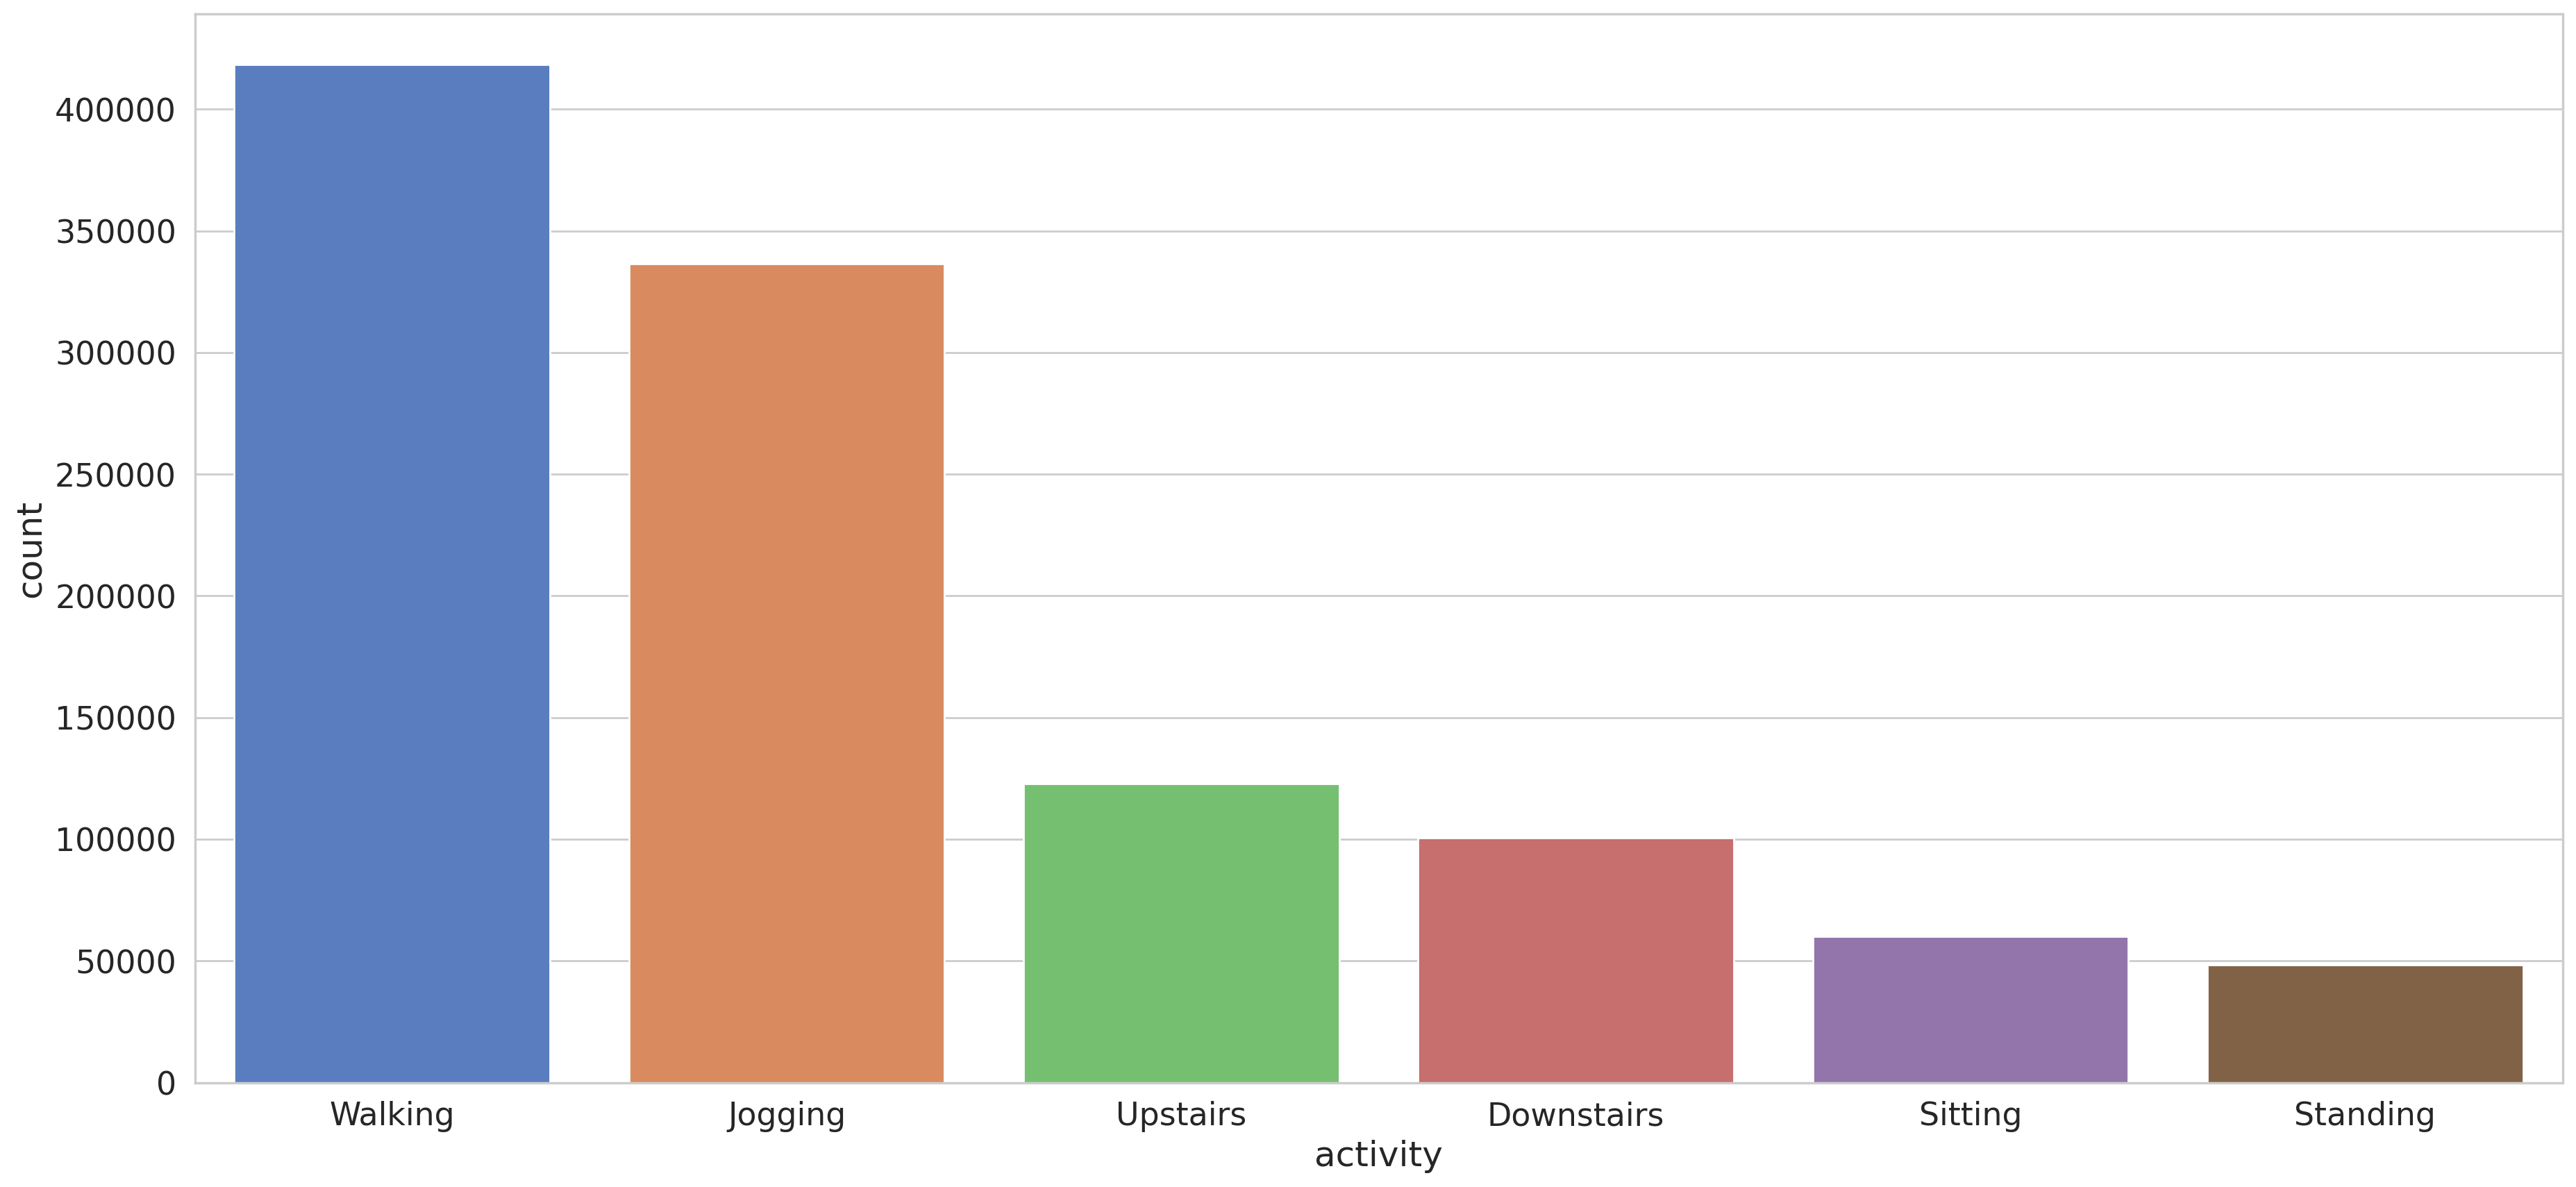

In [ ]:
sns.countplot(x = 'activity',
              data = df,
              order = df.activity.value_counts().index);

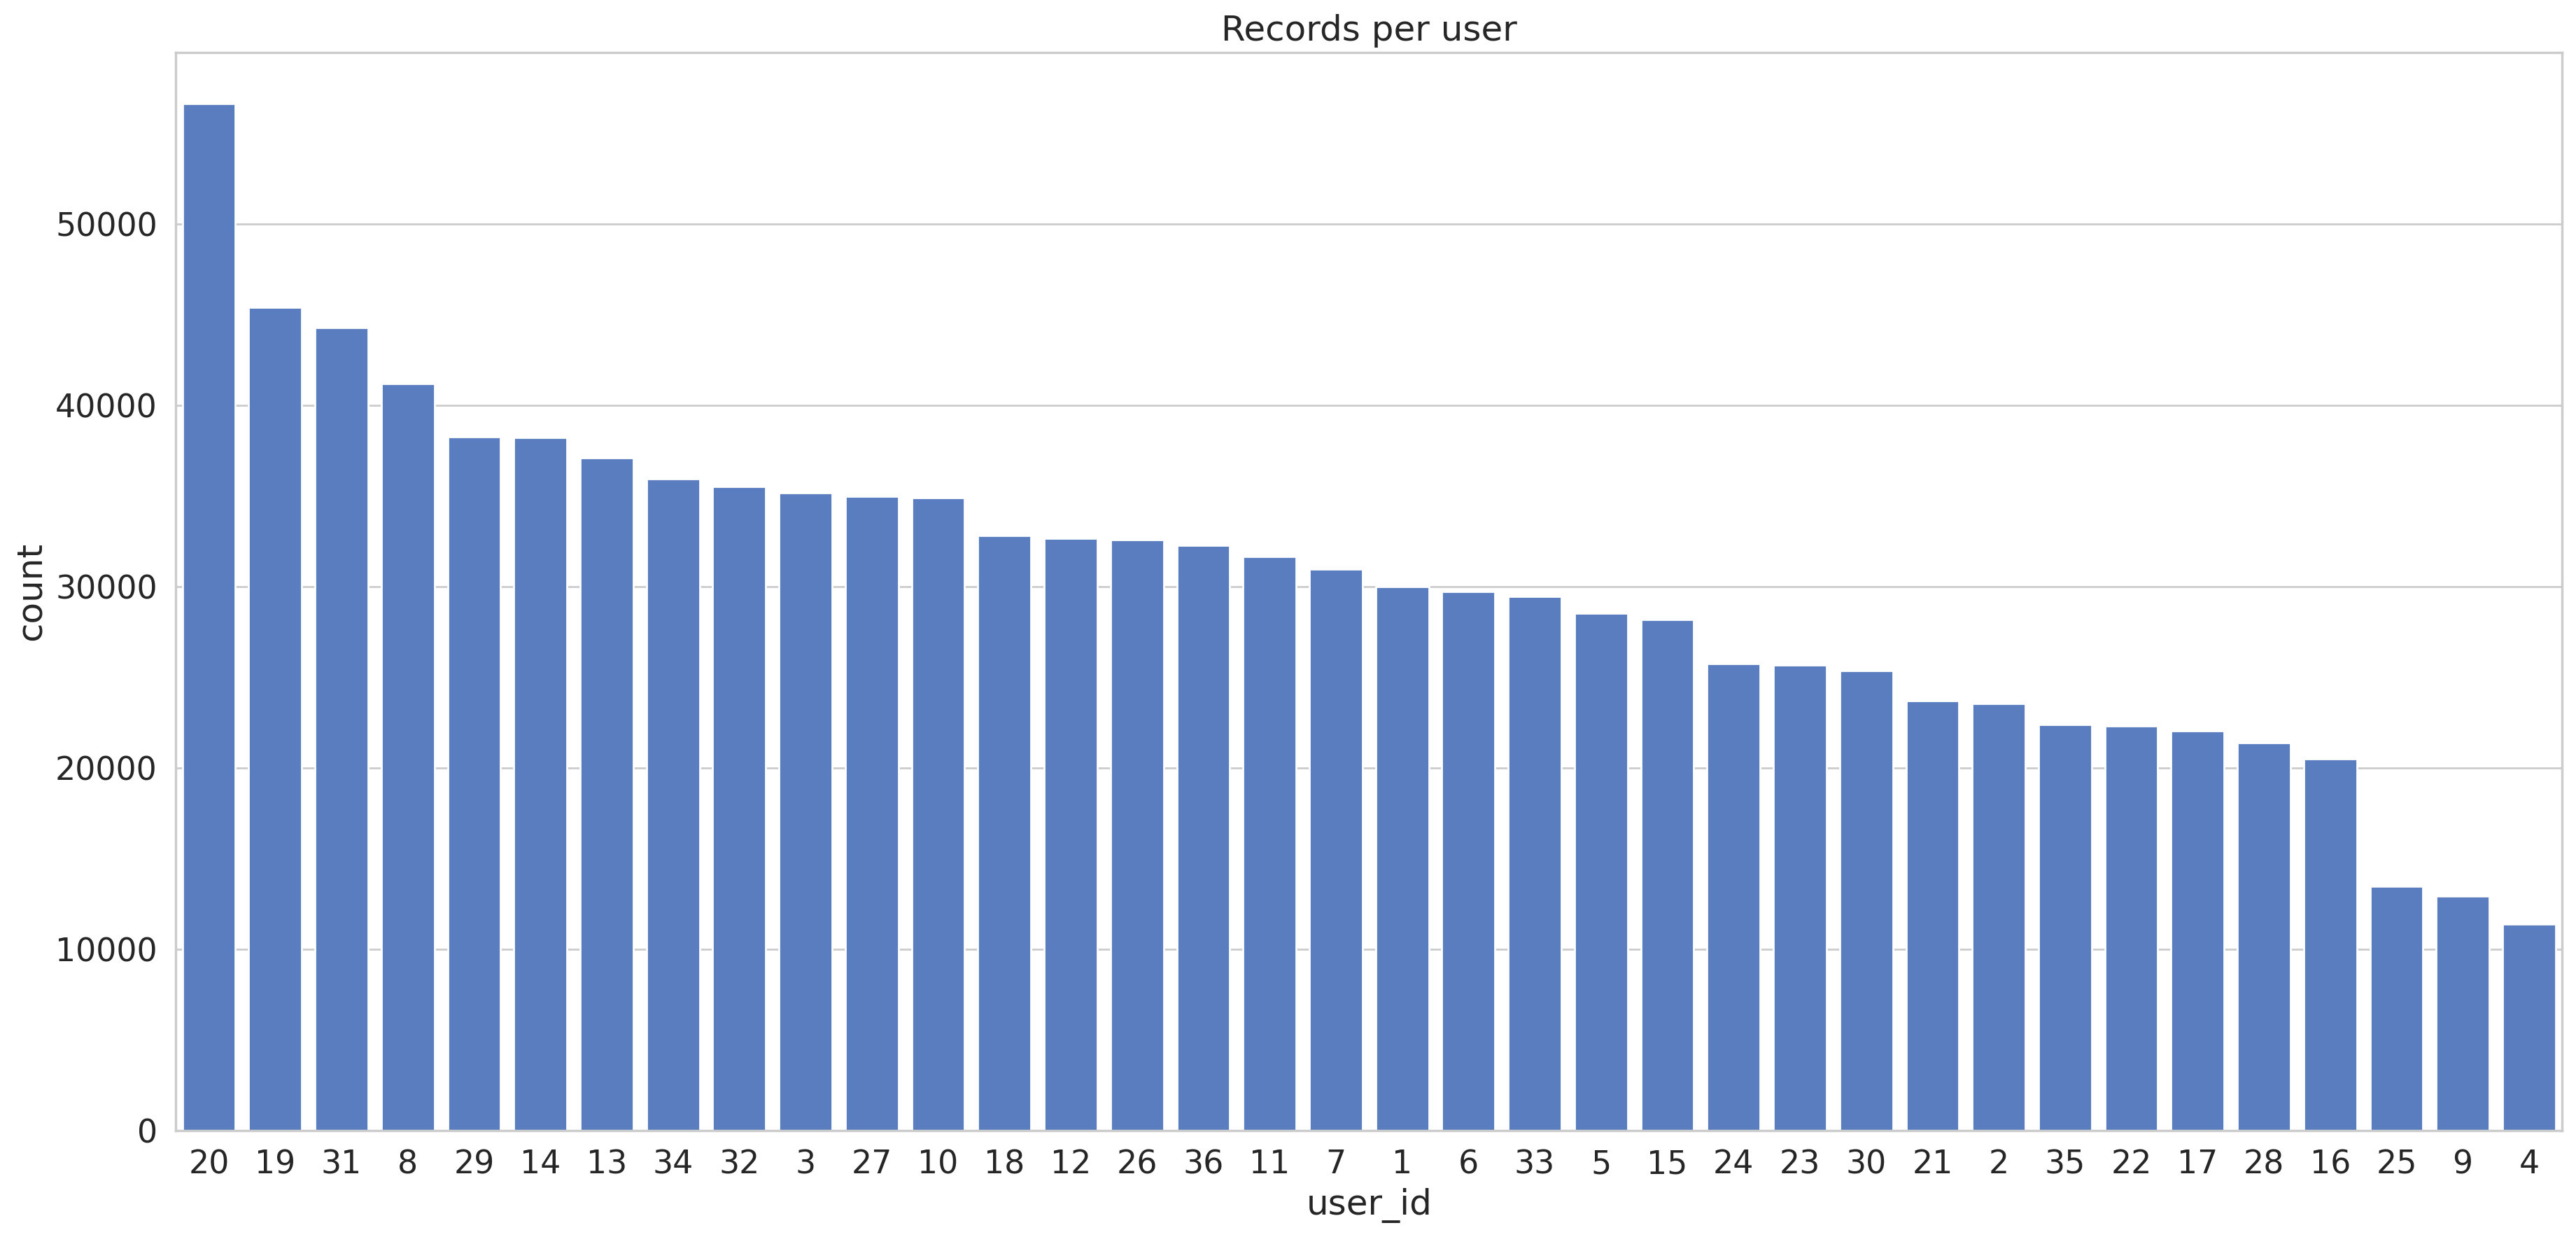

In [ ]:
sns.countplot(x = 'user_id',
              data = df,
              palette=[sns.color_palette()[0]],
              order = df.user_id.value_counts().index);
plt.title("Records per user");

In [ ]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x_axis', 'y_axis', 'z_axis']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

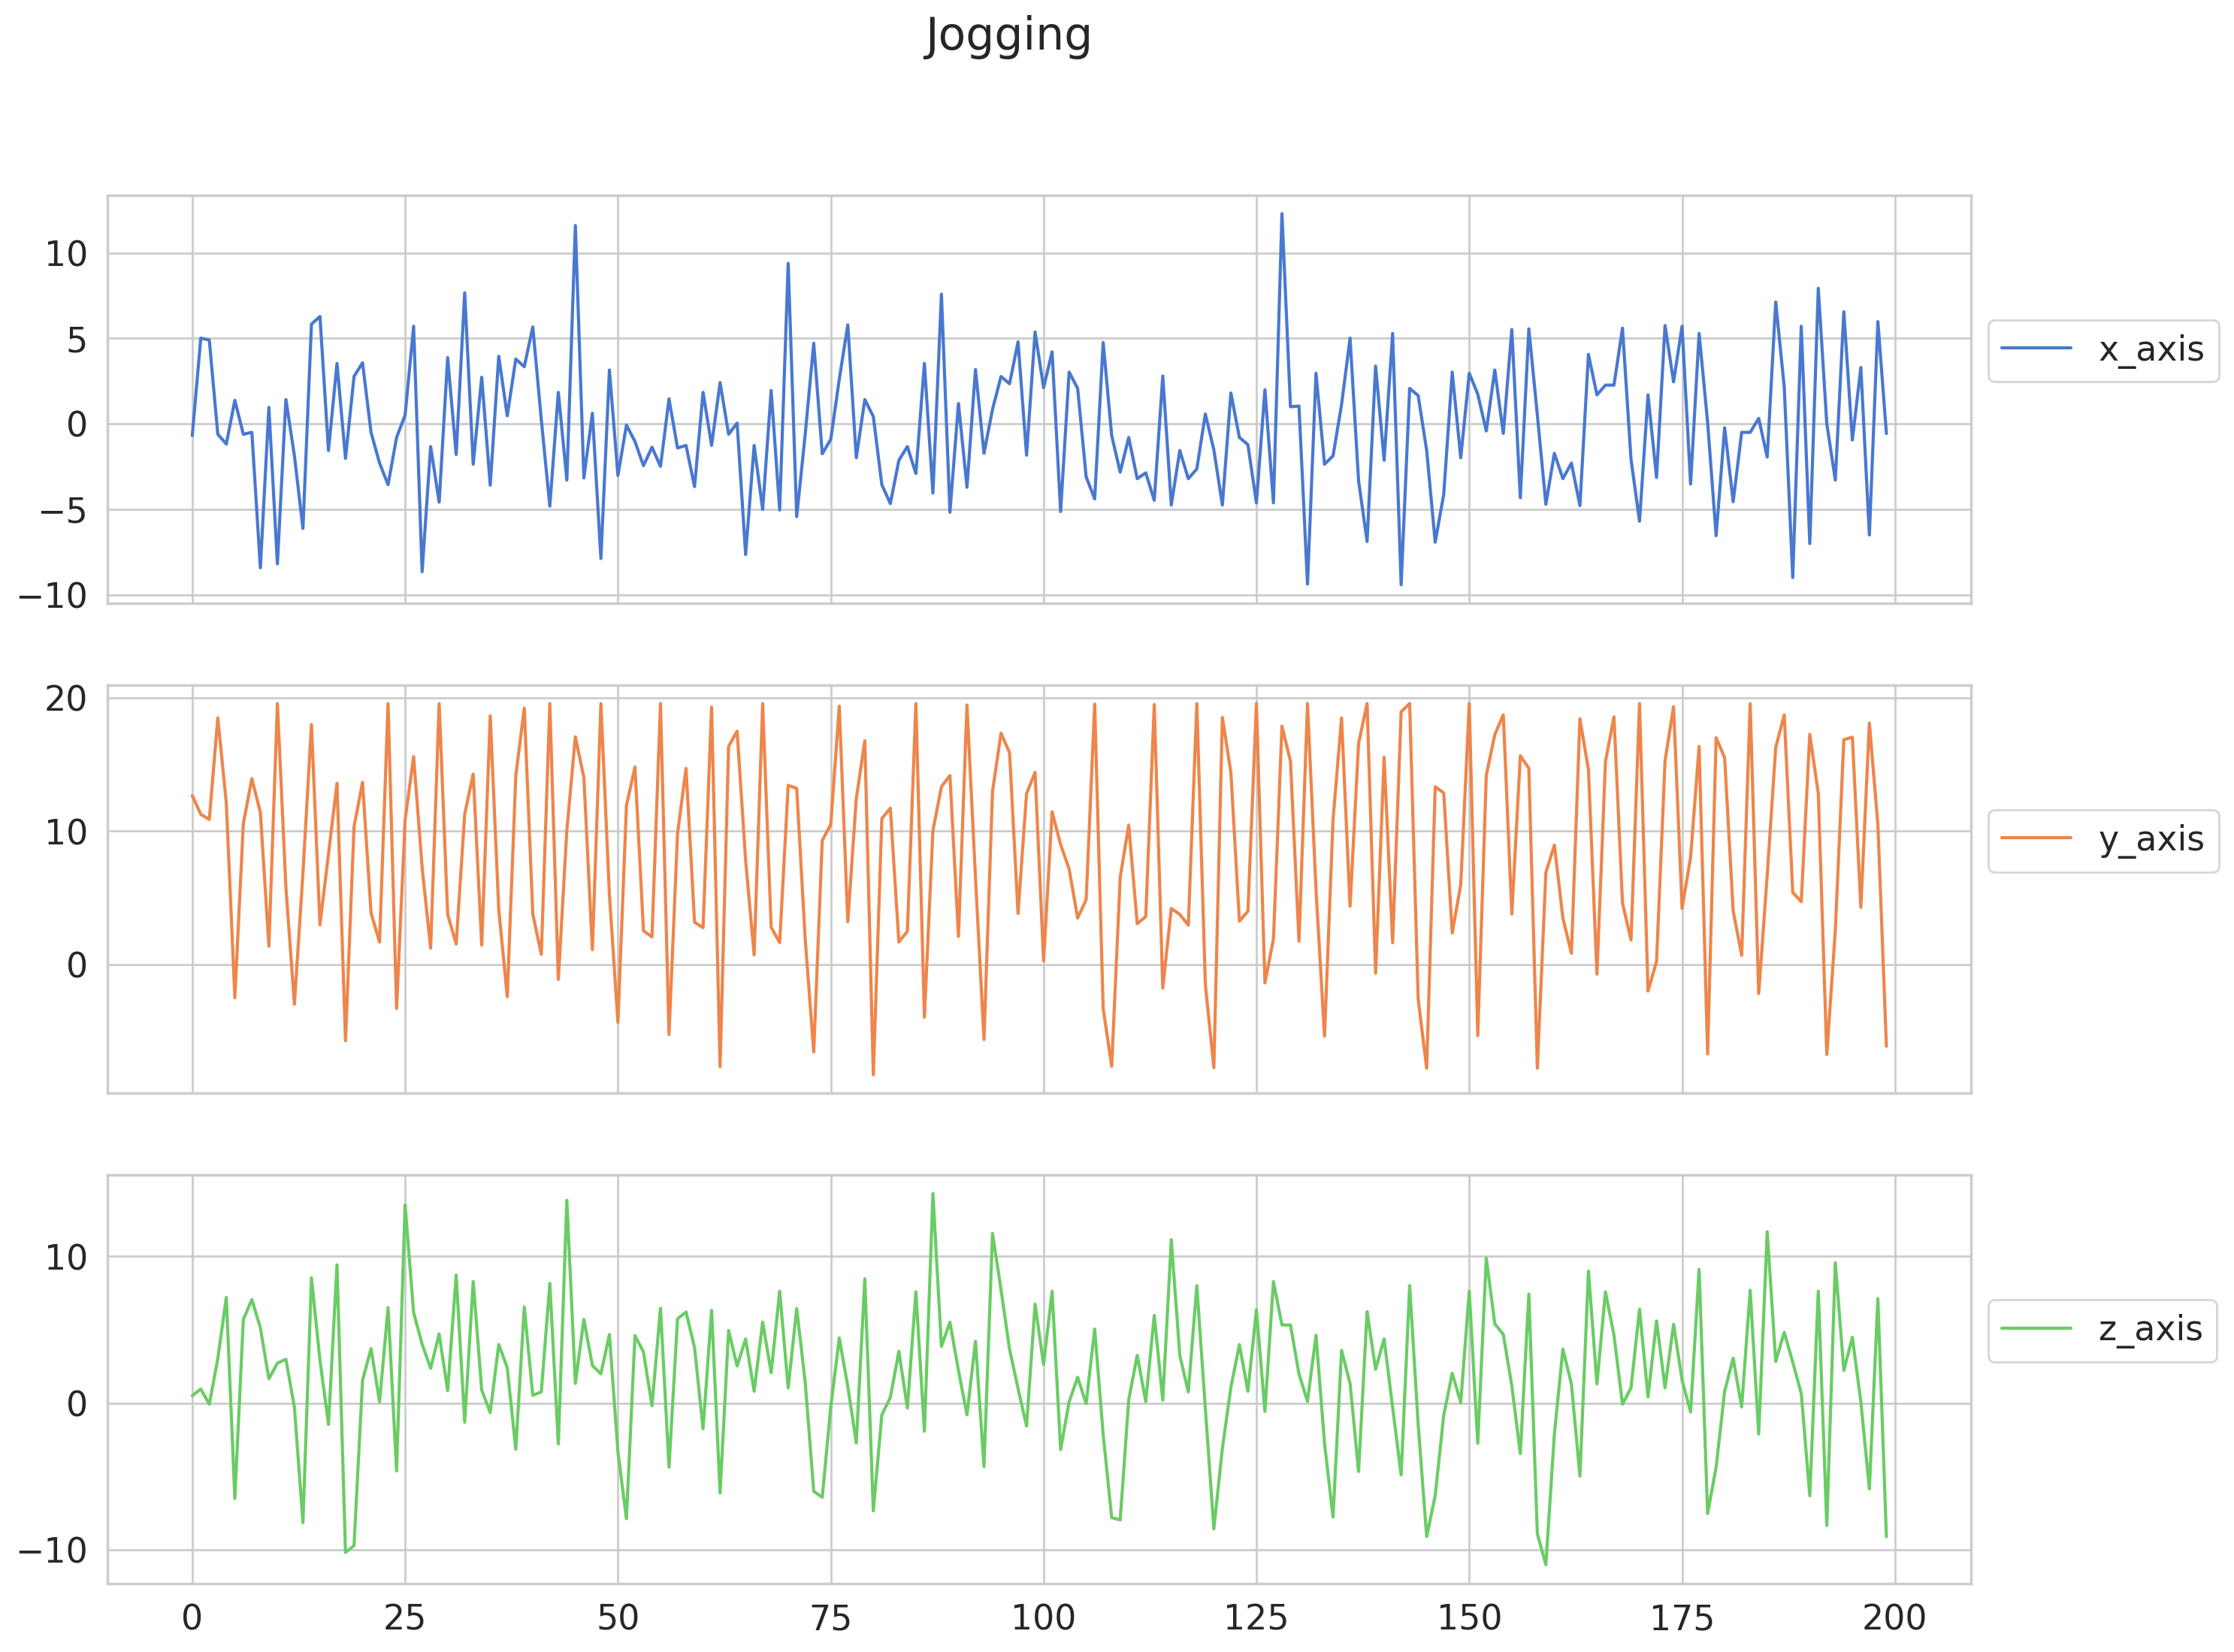

In [ ]:
plot_activity("Jogging", df);

In [ ]:
df_train = df[df['user_id'] <= 30]
df_test = df[df['user_id'] > 30]

In [ ]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['x_axis', 'y_axis', 'z_axis']

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
<ipython-input-14-96ff9802af59>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
<ipython-input-14-96ff9802af59>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
df_train.activity

8489       Walking
8490       Walking
8491       Walking
8492       Walking
8493       Walking
            ...   
1086461    Sitting
1086462    Sitting
1086463    Sitting
1086464    Sitting
1086465    Sitting
Name: activity, Length: 886622, dtype: object

In [ ]:
df_train[['x_axis', 'y_axis', 'z_axis']].iloc[40:(40 + 200)].values

array([[ 0.13454957,  0.10443673,  0.47121603],
       [ 0.14514907,  0.02595215,  0.48774997],
       [ 0.25821032,  0.10934202,  0.62002112],
       [ 0.4366351 ,  0.23360936,  0.62002112],
       [ 0.27764271,  0.09953145,  0.41610305],
       [ 0.14514907,  0.60641116,  0.41610305],
       [ 0.16988121,  0.07336999, -0.10195903],
       [ 0.05505338,  0.21562329, -0.32792227],
       [-0.04387522,  0.27448667, -0.11849292],
       [ 0.21404578,  0.20581261, -0.17911721],
       [ 0.25291057,  0.18782653, -0.11022598],
       [ 0.31297437,  0.21562329, -0.24249715],
       [ 0.28824223,  0.43636122, -0.12400422],
       [ 0.32887361,  0.50012989, -0.31965533],
       [-0.05977445,  0.71105726, -0.49050558],
       [ 0.12924983,  0.38567323,  0.18462851],
       [ 0.20874602, -0.20786651,  0.2617867 ],
       [-0.0650742 , -0.50708908,  0.49601689],
       [ 0.01442199,  0.42164526,  1.33924556],
       [ 0.09921794,  0.48214382, -0.09369208],
       [ 0.36243865,  0.2565006 , -0.534

In [ ]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']],
    df_train.activity,
    TIME_STEPS,
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']],
    df_test.activity,
    TIME_STEPS,
    STEP
)

<ipython-input-19-24e7dca7b412>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
<ipython-input-19-24e7dca7b412>:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ys.append(stats.mode(labels)[0][0])
<ipython-input-19-24e7dca7b412>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0

In [ ]:
y_train

array([['Walking'],
       ['Walking'],
       ['Walking'],
       ...,
       ['Sitting'],
       ['Sitting'],
       ['Sitting']], dtype='<U10')

In [ ]:
print(X_train.shape, y_train.shape)

(22161, 200, 3) (22161, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(X_train.shape, y_train.shape)

(22161, 200, 3) (22161, 6)


In [ ]:
X_train

array([[[ 0.01972174,  0.2565006 , -0.08542513],
        [-0.05447471,  0.30228331, -0.09369208],
        [-0.0845066 ,  0.26140588, -0.11849292],
        ...,
        [ 0.07978554, -0.49237323, -0.07991383],
        [ 0.15928173, -0.03781661,  0.72749144],
        [ 0.20344628,  0.52792653,  1.1298163 ]],

       [[ 0.13454957,  0.10443673,  0.47121603],
        [ 0.14514907,  0.02595215,  0.48774997],
        [ 0.25821032,  0.10934202,  0.62002112],
        ...,
        [-0.01914306, -0.39263241,  0.12951552],
        [ 0.84471556,  0.97921297,  1.09950412],
        [ 0.2193455 ,  0.43636122, -0.4574378 ]],

       [[ 0.20874602,  0.7764611 ,  0.        ],
        [ 0.25821032, -0.14409784, -0.49601688],
        [-0.15870305,  0.06355942,  0.03031214],
        ...,
        [ 0.50199865,  0.58351981,  1.116038  ],
        [ 0.37303816,  0.4543473 ,  0.13778247],
        [ 0.35713891,  0.48214382, -0.52081774]],

       ...,

       [[ 1.09727626, -1.05042017,  0.4630997 ],
        [ 1

In [ ]:
y_train

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/20
312/312 [==============================] - 17s 23ms/step - loss: 1.0776 - acc: 0.6313 - val_loss: 0.8675 - val_acc: 0.7483
Epoch 2/20
312/312 [==============================] - 6s 18ms/step - loss: 0.7944 - acc: 0.7273 - val_loss: 0.8737 - val_acc: 0.7289
Epoch 3/20
312/312 [==============================] - 6s 21ms/step - loss: 0.6755 - acc: 0.7619 - val_loss: 0.6333 - val_acc: 0.7939
Epoch 4/20
312/312 [==============================] - 6s 18ms/step - loss: 0.5715 - acc: 0.7985 - val_loss: 0.4779 - val_acc: 0.8606
Epoch 5/20
312/312 [==============================] - 6s 20ms/step - loss: 0.5034 - acc: 0.8113 - val_loss: 0.5671 - val_acc: 0.7957
Epoch 6/20
312/312 [==============================] - 6s 19ms/step - loss: 0.4150 - acc: 0.8348 - val_loss: 0.4648 - val_acc: 0.8295
Epoch 7/20
312/312 [==============================] - 6s 19ms/step - loss: 0.4756 - acc: 0.8260 - val_loss: 0.7007 - val_acc: 0.8051
Epoch 8/20
312/312 [==============================] - 6s 19ms/step -

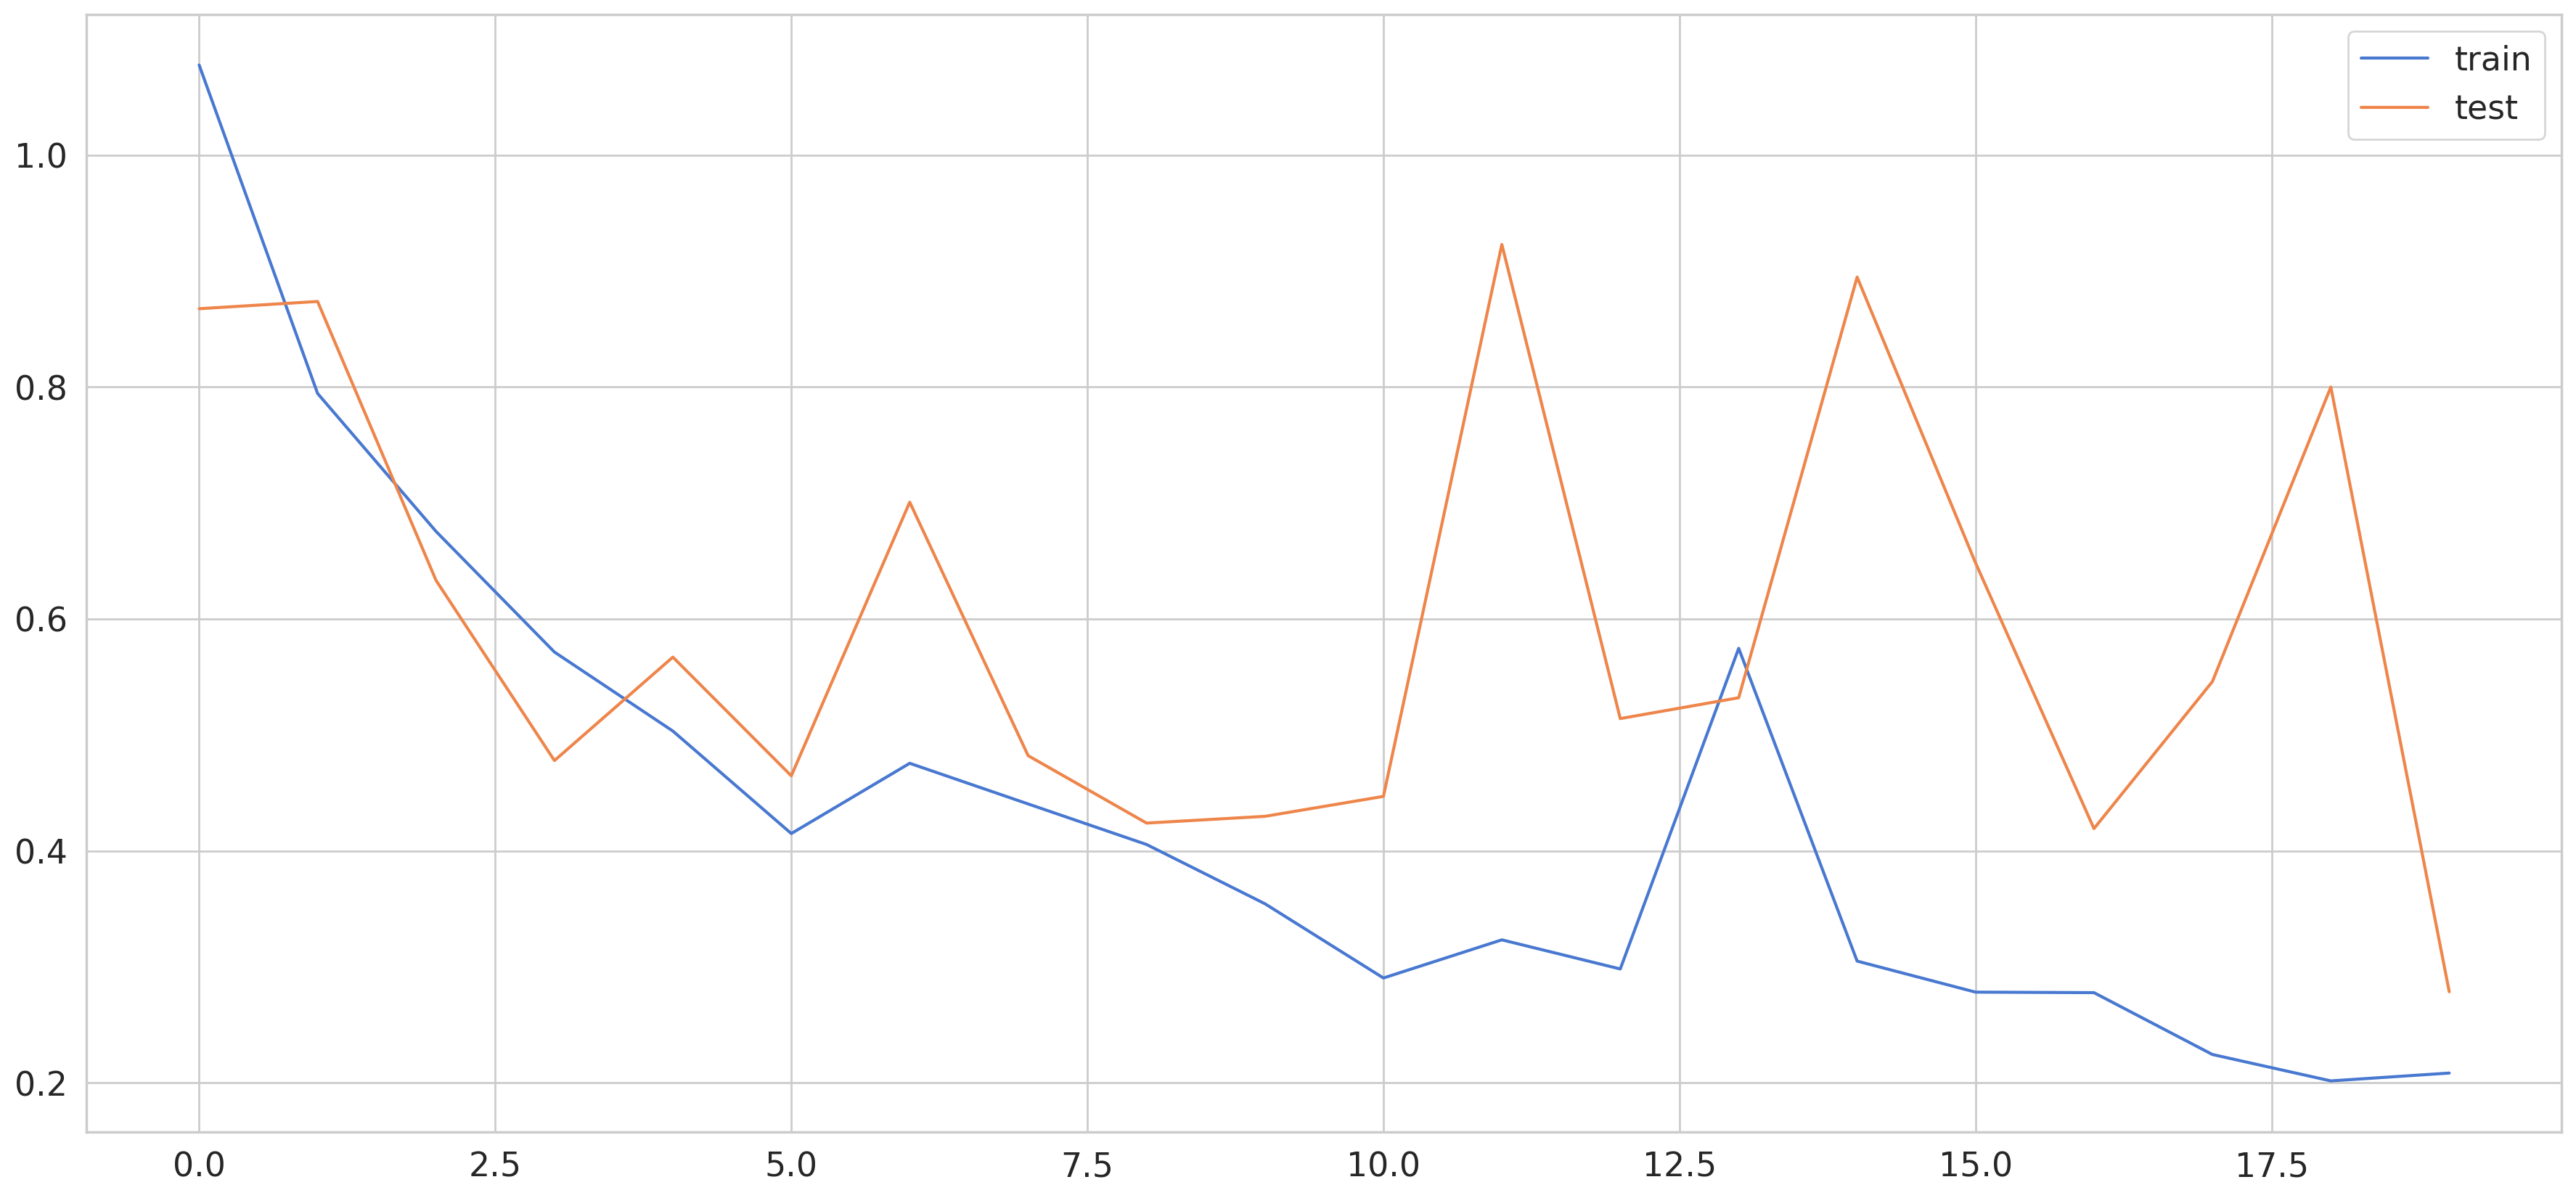

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
model.evaluate(X_test, y_test)

156/156 [==============================] - 1s 8ms/step - loss: 0.3531 - acc: 0.8936


[0.35311076045036316, 0.893629789352417]

In [ ]:
y_pred = model.predict(X_test)

156/156 [==============================] - 2s 8ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16))
  ax = sns.heatmap(
      cm,
      annot=True,
      fmt="d",
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

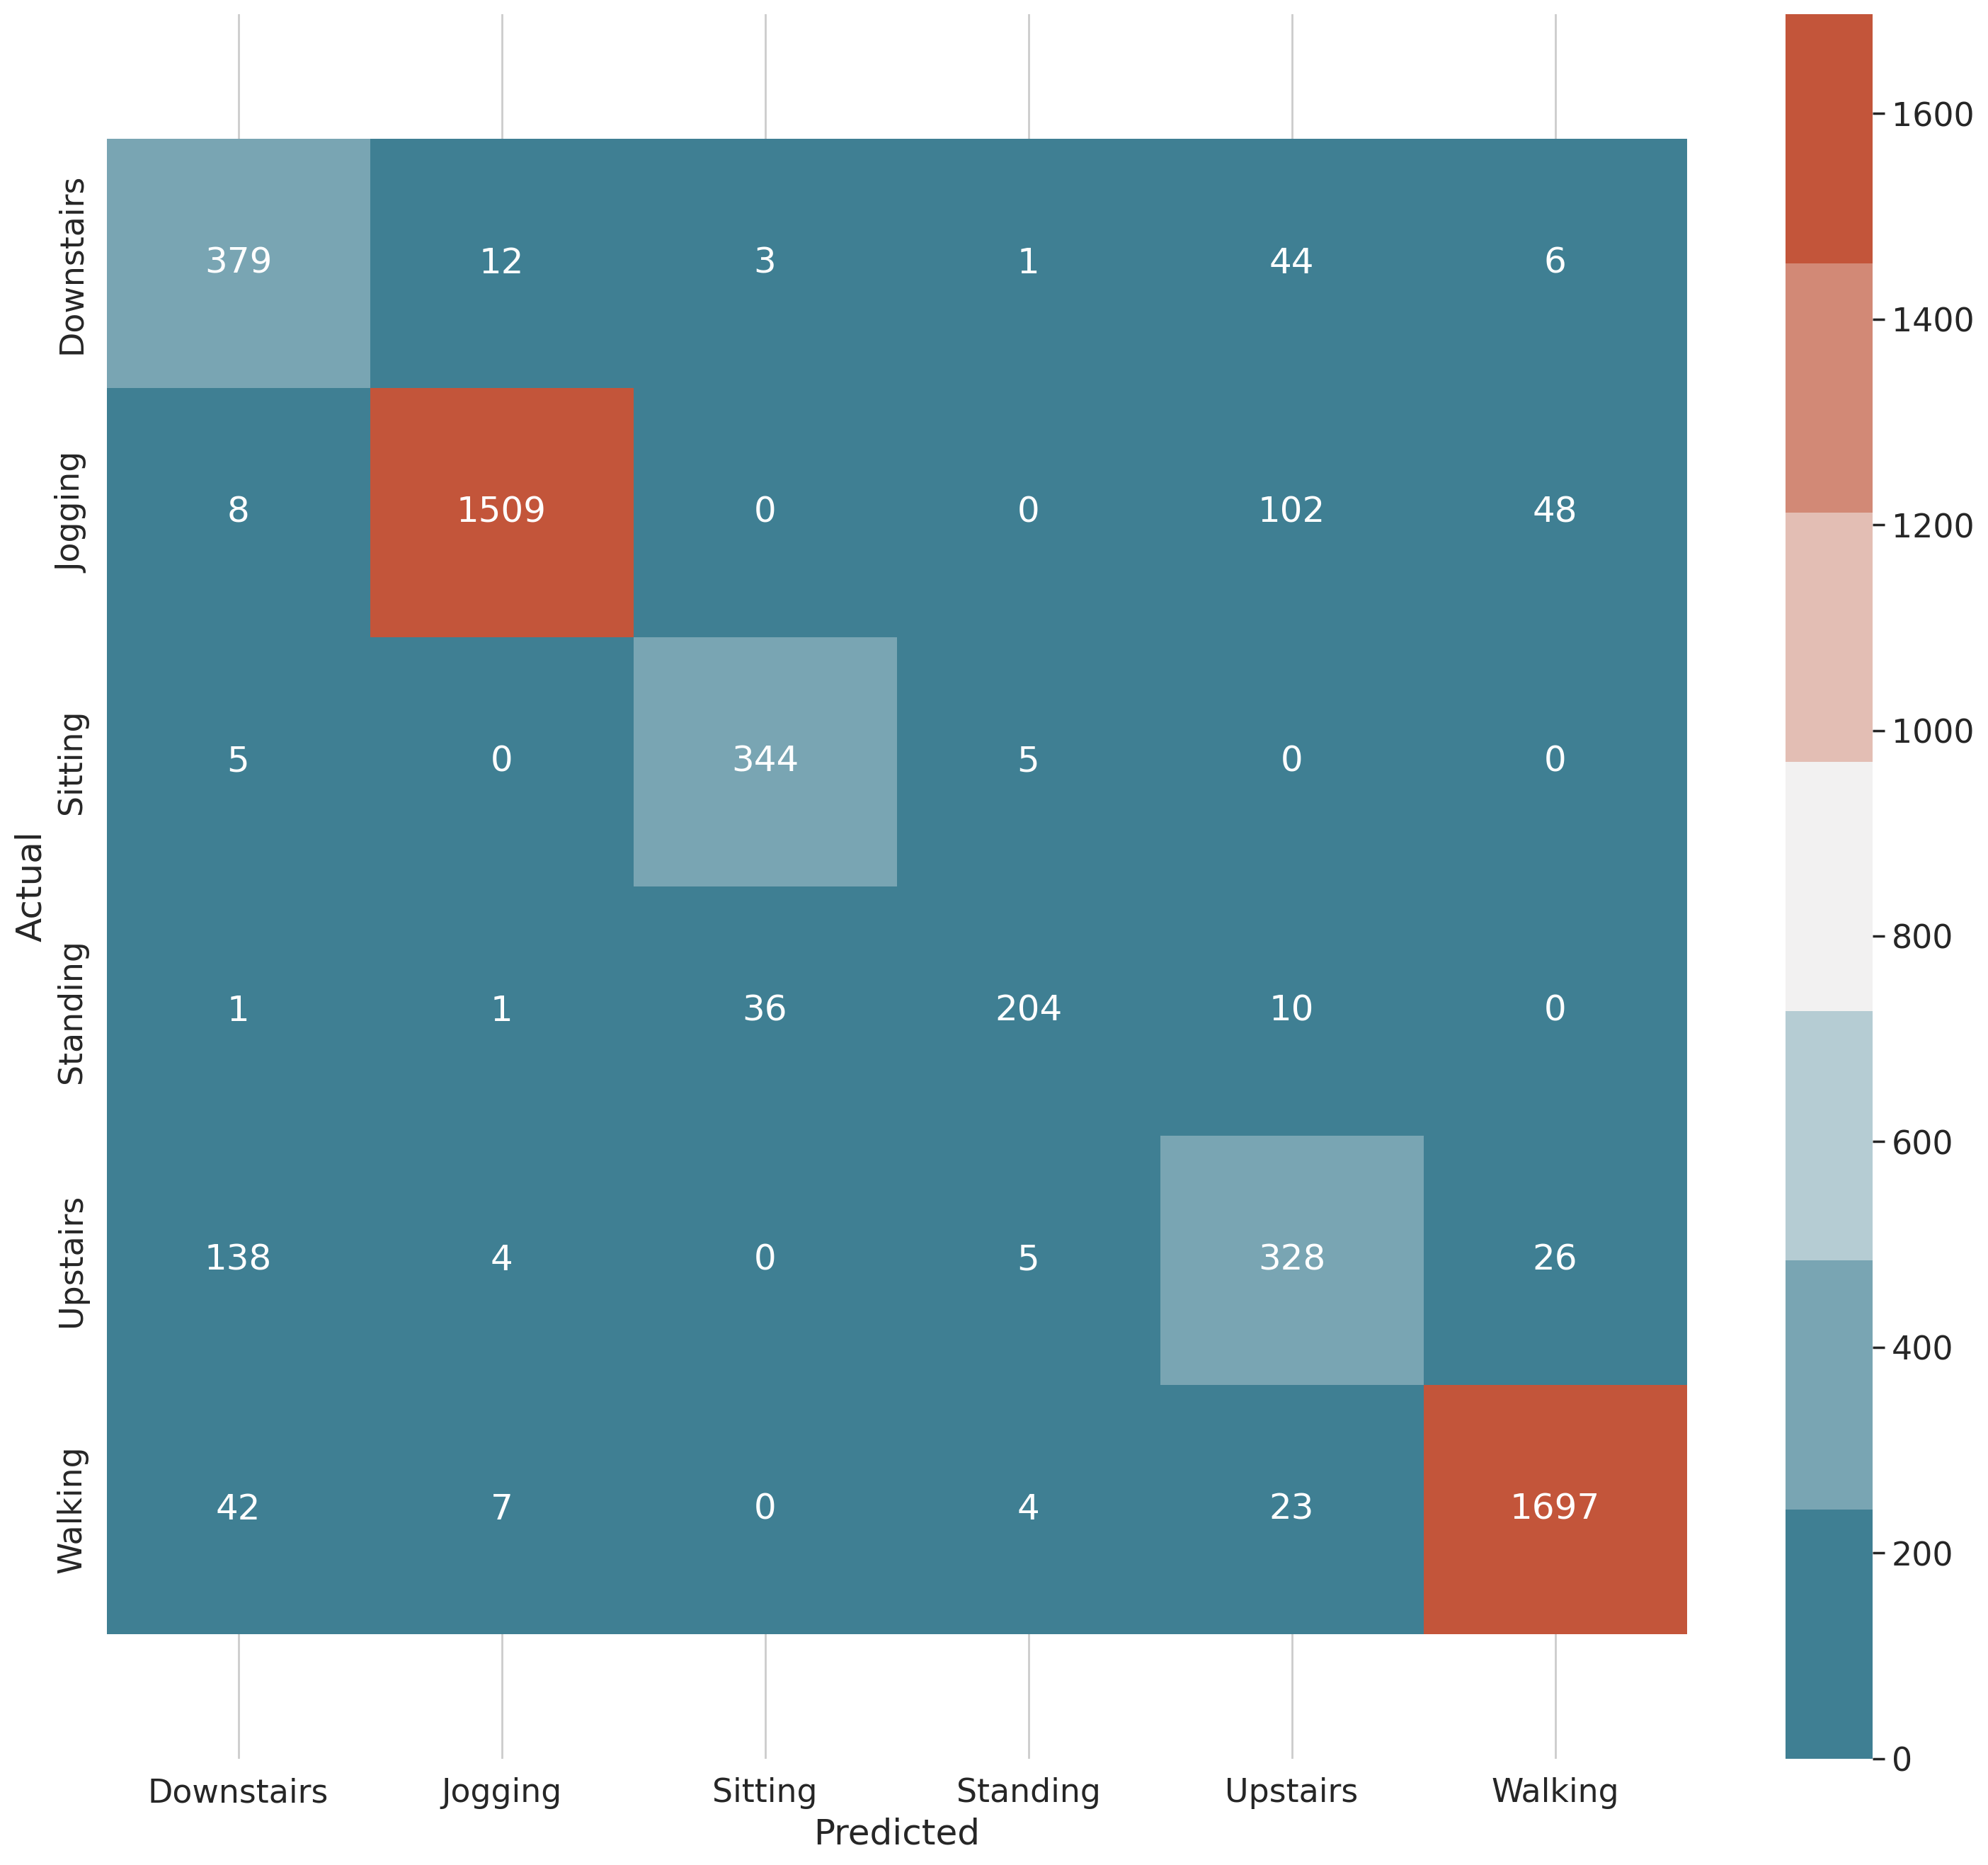

In [ ]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)